In [3]:
from sklearnex import patch_sklearn
patch_sklearn()
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
import pandas as pd
import pathlib
import gc
gc.collect()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


0

In [4]:
x = np.load('../dados/Hypercellularity/13.1-final_dataset_200x200_axissumm/x.npy')
y = np.load('../dados/Hypercellularity/13.1-final_dataset_200x200_axissumm/y.npy')
y = y.ravel()


In [116]:
x.shape

(811, 4320)

(array([-1,  1], dtype=int64), array([511, 300], dtype=int64))

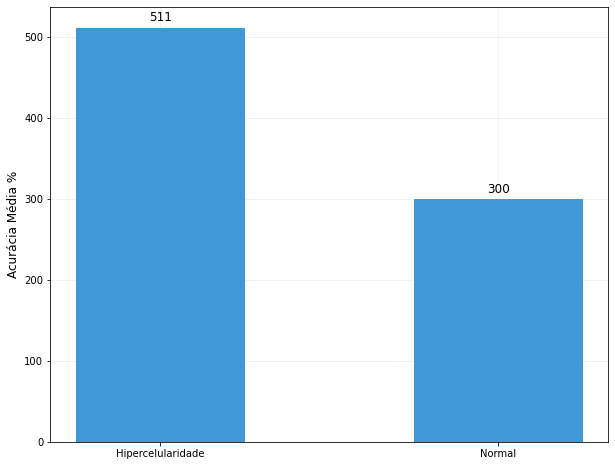

In [115]:
w, h = np.unique(y, return_counts=True)


xlabels = [
    'Hipercelularidade',
    'Normal'
]

top_1 = h

N = len(h)
ind = np.arange(N)  # the x locations for the groups
# major_ticks = np.arange(-0.5, 2.5, 0.10)
# minor_ticks = np.arange(-0.5, 2.5, 0.05)
width = 0.5      # the width of the bars
fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(ind, top_1, width, color='#4198d7',zorder=3)
ax.set_xticks(ind )
ax.set_xticklabels(xlabels,fontsize=10, rotation=0)
# ax.set_xlabel("models", fontsize=12)
ax.set_ylabel("Acurácia Média %", fontsize=12)
# ax.set_title('Metrics for ML models')
ax.grid(zorder=-1, alpha=0.2)
# ax.set_xticks(major_ticks)
# ax.set_xticks(minor_ticks, minor=True)
# ax.set_yticks(major_ticks)
# ax.set_yticks(minor_ticks, minor=True)

# ax.set_ylim([0,1])

# ax.legend(rects1[0],'Accuracy Test')
def labelvalue(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
        str(height) ,ha='center', va='bottom',fontsize=12)

labelvalue(rects1)

plt.show()

In [24]:

# kernels : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
kernels = ['linear', 'poly', 'rbf']
Accuracy = []
Accuracy_ = []
for kernel in kernels:
    model =  SVC(kernel=kernel ,probability=True, random_state=40)
    
    # Create StratifiedKFold object.
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    fold_results = []
    
    for train_index, test_index in skf.split(x, y):

        model.fit(x[train_index], y[train_index])
        fold_results.append(model.score(x[test_index], y[test_index]))
    
    Accuracy_.append(fold_results)
    Accuracy.append(np.mean(fold_results))

print(Accuracy_)   
print(Accuracy)
print(f'2-Fold size train > {train_index.shape}')
print(f'2-Fold size test > {test_index.shape}')
print(f'2-Fold size test > {np.unique(y[train_index], return_counts=True)}')

c:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[0.6748466257668712, 0.7098765432098766, 0.7469135802469136, 0.7160493827160493, 0.7283950617283951], [0.6319018404907976, 0.6296296296296297, 0.6296296296296297, 0.6296296296296297, 0.6296296296296297], [0.6319018404907976, 0.6296296296296297, 0.6296296296296297, 0.6296296296296297, 0.6296296296296297]]
[0.7152162387336212, 0.6300840718018633, 0.6300840718018633]
2-Fold size train > (649,)
2-Fold size test > (162,)
2-Fold size test > (array([-1,  1], dtype=int64), array([409, 240], dtype=int64))


In [ ]:
np.std([])

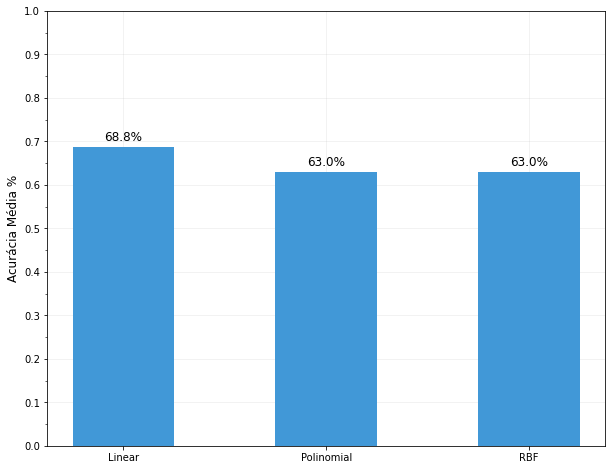

In [101]:

top_1 = Accuracy
xlabels = ['Linear', 'Polinomial', 'RBF']
N = len(Accuracy)
ind = np.arange(N)  # the x locations for the groups
major_ticks = np.arange(-0.5, 2.5, 0.10)
minor_ticks = np.arange(-0.5, 2.5, 0.05)
width = 0.5      # the width of the bars
fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(ind, top_1, width, color='#4198d7',zorder=3)
ax.set_xticks(ind )
ax.set_xticklabels(xlabels,fontsize=10, rotation=0)
# ax.set_xlabel("models", fontsize=12)
ax.set_ylabel("Acurácia Média %", fontsize=12)
# ax.set_title('Metrics for ML models')
ax.grid(zorder=-1, alpha=0.2)
# ax.set_xticks(major_ticks)
# ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

ax.set_ylim([0,1])

# ax.legend(rects1[0],'Accuracy Test')
def labelvalue(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
        str(round(height*100,1))+'%' ,ha='center', va='bottom',fontsize=12)

labelvalue(rects1)

plt.show()

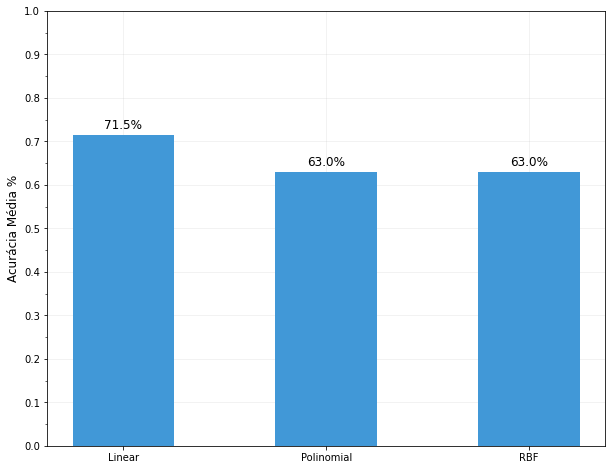

In [103]:

top_1 = Accuracy
xlabels = ['Linear', 'Polinomial', 'RBF']
N = len(Accuracy)
ind = np.arange(N)  # the x locations for the groups
major_ticks = np.arange(-0.5, 2.5, 0.10)
minor_ticks = np.arange(-0.5, 2.5, 0.05)
width = 0.5      # the width of the bars
fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(ind, top_1, width, color='#4198d7',zorder=3)
ax.set_xticks(ind )
ax.set_xticklabels(xlabels,fontsize=10, rotation=0)
# ax.set_xlabel("models", fontsize=12)
ax.set_ylabel("Acurácia Média %", fontsize=12)
# ax.set_title('Metrics for ML models')
ax.grid(zorder=-1, alpha=0.2)
# ax.set_xticks(major_ticks)
# ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

ax.set_ylim([0,1])

# ax.legend(rects1[0],'Accuracy Test')
def labelvalue(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
        str(round(height*100,1))+'%' ,ha='center', va='bottom',fontsize=12)

labelvalue(rects1)

plt.show()

In [123]:

hidden_layers = [(100,), (150,100,50),(100,250,250,100,50)]

Accuracy = []
Accuracy_ = []
for hidden_layer_size in hidden_layers:
    model =  MLPClassifier(hidden_layer_sizes=hidden_layer_size, random_state=40)
    
    # Create StratifiedKFold object.
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    # kfold = KFold(n_splits=2, shuffle=True, random_state=1)
    fold_results = []
    
    for train_index, test_index in kfold.split(x, y):

        model.fit(x[train_index], y[train_index])
        fold_results.append(model.score(x[test_index], y[test_index]))
    Accuracy_.append(fold_results)
    Accuracy.append(np.mean(fold_results))

print(Accuracy_)   
print(Accuracy)
print(f'5-Fold size train > {train_index.shape}')
print(f'5-Fold size test > {test_index.shape}')

[[0.6380368098159509, 0.6419753086419753, 0.6358024691358025, 0.6728395061728395, 0.6358024691358025], [0.6319018404907976, 0.6481481481481481, 0.6790123456790124, 0.6851851851851852, 0.7037037037037037], [0.5828220858895705, 0.654320987654321, 0.691358024691358, 0.6790123456790124, 0.6975308641975309]]
[0.6448913125804742, 0.6695902446413694, 0.6610088616223585]
5-Fold size train > (649,)
5-Fold size test > (162,)


In [ ]:
np.std([])

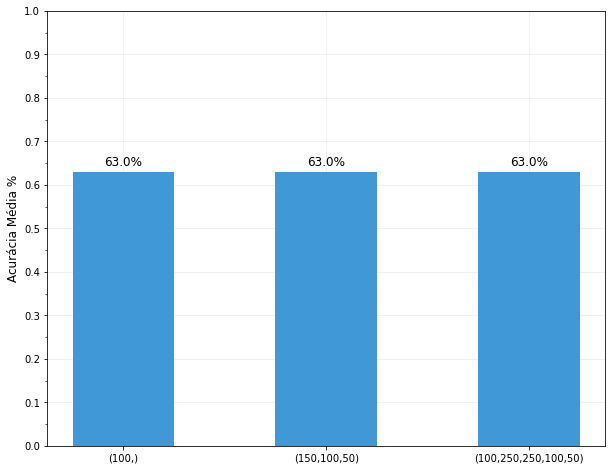

In [122]:

top_1 = Accuracy
xlabels = ['(100,)', '(150,100,50)', '(100,250,250,100,50)']
N = len(Accuracy)
ind = np.arange(N)  # the x locations for the groups
major_ticks = np.arange(-0.5, 2.5, 0.10)
minor_ticks = np.arange(-0.5, 2.5, 0.05)
width = 0.5      # the width of the bars
fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(ind, top_1, width, color='#4198d7',zorder=3)
ax.set_xticks(ind )
ax.set_xticklabels(xlabels,fontsize=10, rotation=0)
# ax.set_xlabel("models", fontsize=12)
ax.set_ylabel("Acurácia Média %", fontsize=12)
# ax.set_title('Metrics for ML models')
ax.grid(zorder=-1, alpha=0.2)
# ax.set_xticks(major_ticks)
# ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

ax.set_ylim([0,1])

# ax.legend(rects1[0],'Accuracy Test')
def labelvalue(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
        str(round(height*100,1))+'%' ,ha='center', va='bottom',fontsize=12)

labelvalue(rects1)

plt.show()

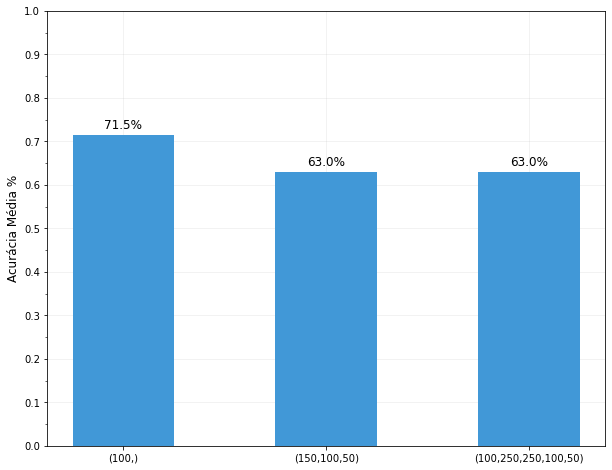

In [125]:

top_1 = Accuracy
xlabels = ['(100,)', '(150,100,50)', '(100,250,250,100,50)']
N = len(Accuracy)
ind = np.arange(N)  # the x locations for the groups
major_ticks = np.arange(-0.5, 2.5, 0.10)
minor_ticks = np.arange(-0.5, 2.5, 0.05)
width = 0.5      # the width of the bars
fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(ind, top_1, width, color='#4198d7',zorder=3)
ax.set_xticks(ind )
ax.set_xticklabels(xlabels,fontsize=10, rotation=0)
# ax.set_xlabel("models", fontsize=12)
ax.set_ylabel("Acurácia Média %", fontsize=12)
# ax.set_title('Metrics for ML models')
ax.grid(zorder=-1, alpha=0.2)
# ax.set_xticks(major_ticks)
# ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

ax.set_ylim([0,1])

# ax.legend(rects1[0],'Accuracy Test')
def labelvalue(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
        str(round(height*100,1))+'%' ,ha='center', va='bottom',fontsize=12)

labelvalue(rects1)

plt.show()

In [16]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {
               # "Training Accuracy scores": results['train_accuracy'],
          #     "Mean Training Accuracy": results['train_accuracy'].mean()*100,
          #     "Training Precision scores": results['train_precision'],
          #     "Mean Training Precision": results['train_precision'].mean(),
          #     "Training Recall scores": results['train_recall'],
          #     "Mean Training Recall": results['train_recall'].mean(),
          #     "Training F1 scores": results['train_f1'],
          #     "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'].std(),
              "Mean Validation Accuracy": results['test_accuracy'].mean(),
              "Validation Precision scores": results['test_precision'].std(),
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'].std(),
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'].std(),
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [17]:
model =  model =  SVC(kernel='linear', probability=True, random_state=40)
results_svm = cross_validation(model, x, y, _cv=5)
# results_svm = pd.DataFrame(results_svm)

In [18]:
results_svm

{'Validation Accuracy scores': 0.03676569646399904,
 'Mean Validation Accuracy': 0.7409982579716731,
 'Validation Precision scores': 0.05369126538259817,
 'Mean Validation Precision': 0.6555787979605293,
 'Validation Recall scores': 0.05011098792790968,
 'Mean Validation Recall': 0.6399999999999999,
 'Validation F1 scores': 0.04494927717669976,
 'Mean Validation F1 Score': 0.6466293129472902}

In [19]:
model =  MLPClassifier(hidden_layer_sizes=(150,100,50), random_state=40)
results_mlp = cross_validation(model, x, y, _cv=5)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
results_mlp

{'Validation Accuracy scores': 0.02322913069234139,
 'Mean Validation Accuracy': 0.6510717261228509,
 'Validation Precision scores': 0.32979587053108783,
 'Mean Validation Precision': 0.5685805422647527,
 'Validation Recall scores': 0.24975543593238925,
 'Mean Validation Recall': 0.2533333333333333,
 'Validation F1 scores': 0.2263034891484376,
 'Mean Validation F1 Score': 0.27895791612137033}